In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [19]:
# Load the data

df = pd.read_csv('Carvago_encoded.csv')

# Distribution of Numerical feaures

In [20]:
numerical_column=  ['Year', 'Mileage' , 'Power', 'price', 'Consumption_Standardized' , 'CO2_emissions', 'Engine_capacity' ]


## Les histogrammes   

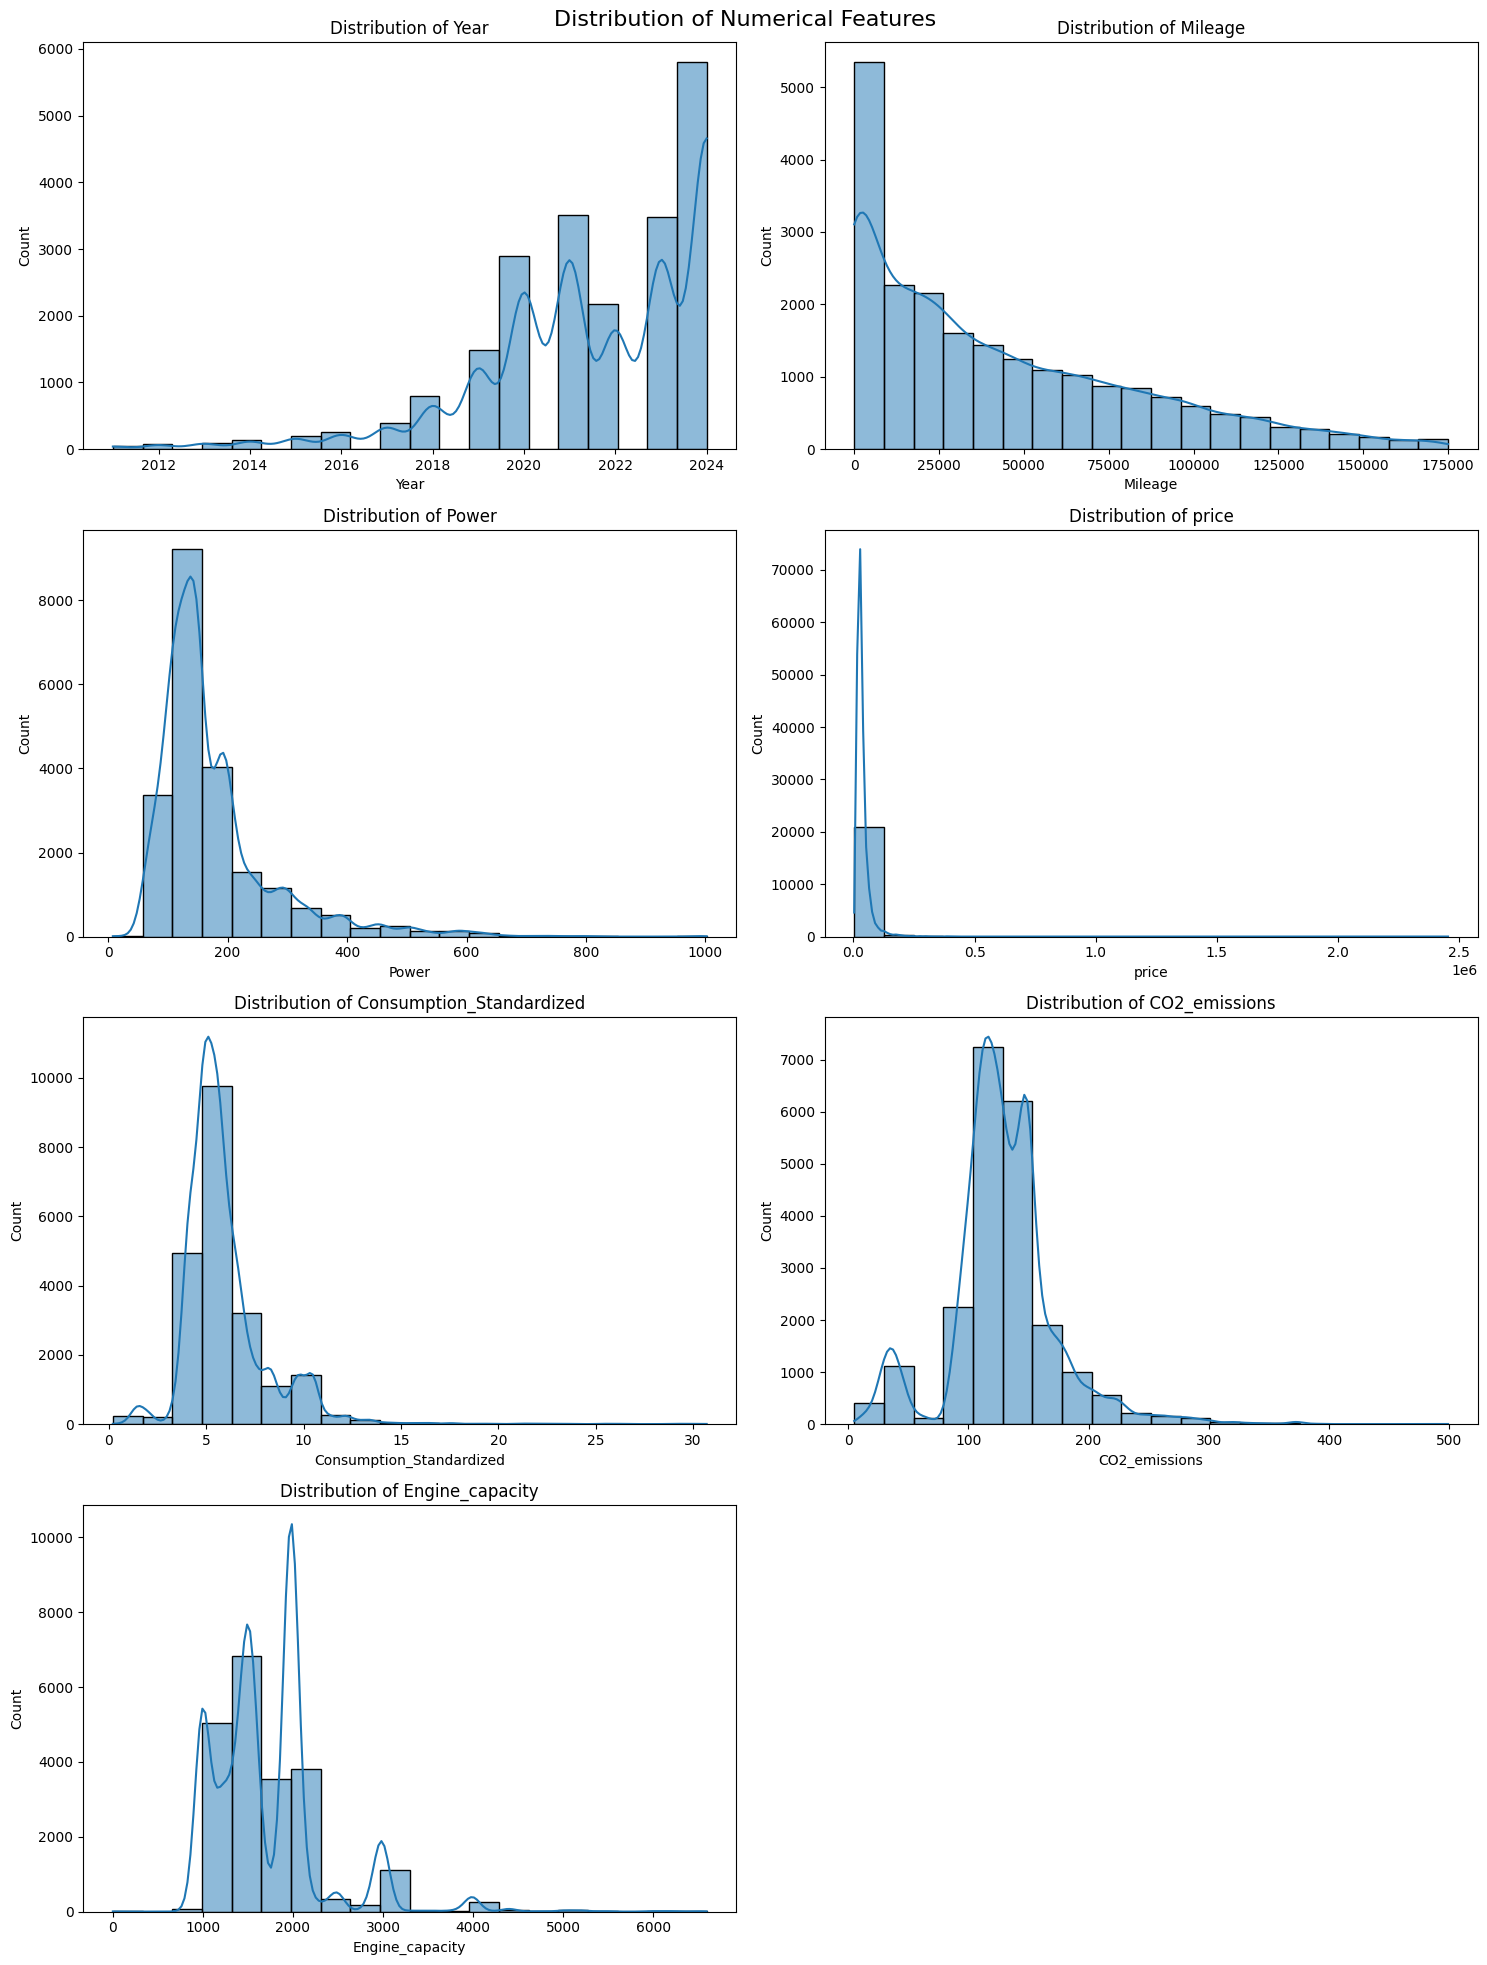


Basic statistics for numerical features:
               Year        Mileage         Power         price  \
count  21360.000000   21360.000000  21360.000000  2.136000e+04   
mean    2021.534270   43059.659176    177.560861  3.623080e+04   
std        2.387042   41300.205212    100.025867  3.646258e+04   
min     2011.000000       0.000000      8.000000  2.899000e+03   
25%     2020.000000    8650.000000    114.000000  2.054900e+04   
50%     2022.000000   30502.000000    148.000000  2.844900e+04   
75%     2024.000000   68882.000000    201.000000  4.071150e+04   
max     2024.000000  175000.000000   1002.000000  2.454249e+06   

       Consumption_Standardized  CO2_emissions  Engine_capacity  
count              21360.000000   21360.000000     21360.000000  
mean                   5.945044     129.796161      1715.672659  
std                    2.153325      44.446068       623.862615  
min                    0.200000       5.000000         1.000000  
25%                    4.700000  

In [21]:
# Create distribution plots for numerical features
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot distribution for each numerical feature
for idx, col in enumerate(numerical_column):
    sns.histplot(data=df[col], bins=20, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')

# Remove empty subplot if odd number of features
if len(numerical_column) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Display basic statistics
print("\nBasic statistics for numerical features:")
print(df[numerical_column].describe())

## Boxplots 

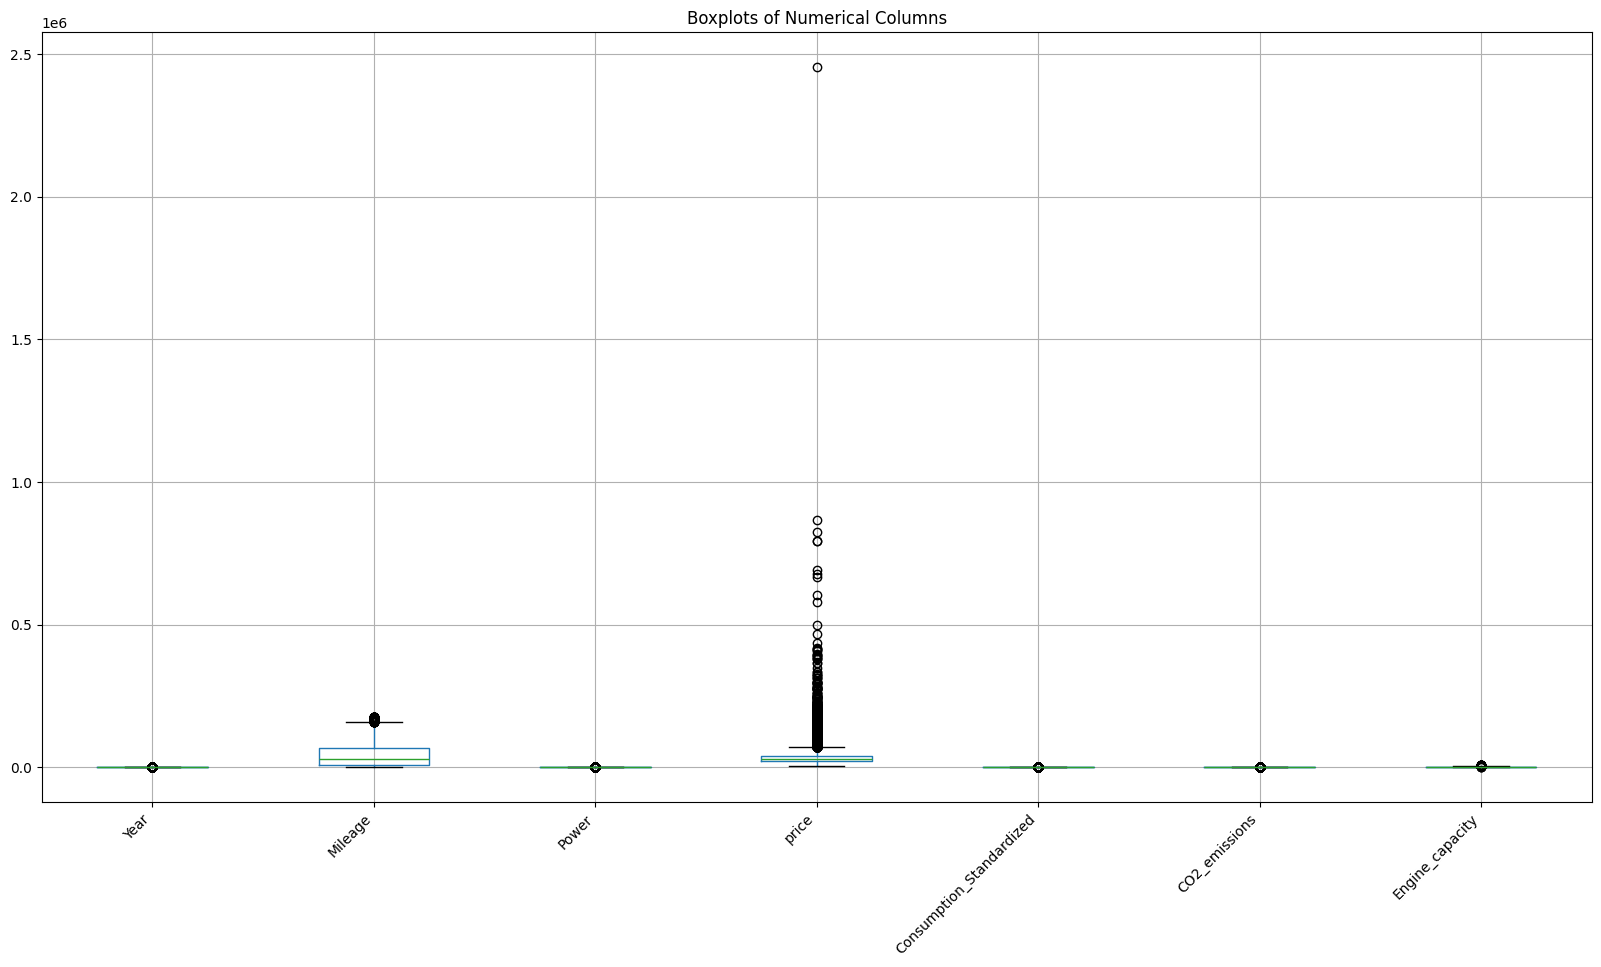

In [22]:

# Boxplots
plt.figure(figsize=(20, 10))
df[numerical_column].boxplot()
plt.title('Boxplots of Numerical Columns')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Remarques :

**Year**

***Distribution*** : La majorité des données sont concentrées autour de la médiane, avec une faible variabilité.

***Outliers*** : Quelques valeurs sont situées en dehors des moustaches, indiquant des années de fabrication atypiques (peut-être très anciennes ou très récentes par rapport à la majorité des voitures du dataset).


**Mileage**

***Distribution*** : Le kilométrage des véhicules est relativement concentré autour de la médiane.

***Outliers*** : Quelques véhicules ont des kilométrages extrêmement élevés ou bas par rapport à la majorité, ce qui pourrait indiquer des véhicules très usés ou très peu utilisés.

**Power**

***Distribution*** : La puissance des véhicules est concentrée autour de la médiane, avec quelques valeurs extrêmes.

***Outliers*** : Il y a quelques valeurs de puissance très élevées ou très faibles, suggérant des véhicules extrêmement puissants ou sous-puissants.

**Price**

***Distribution*** : La distribution des prix montre une grande variabilité, avec de nombreuses valeurs extrêmes.

***Outliers*** : Un nombre significatif de véhicules ont des prix beaucoup plus élevés que la majorité, atteignant jusqu'à environ 2,5 millions, ce qui pourrait indiquer des voitures de luxe ou des modèles rares.

**Engine_capacity**

***Distribution*** : La capacité des moteurs montre une distribution serrée autour de la médiane.

***Outliers*** : Quelques valeurs extrêmes pour la capacité des moteurs, suggérant des véhicules avec des moteurs exceptionnellement grands ou petits.

## Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

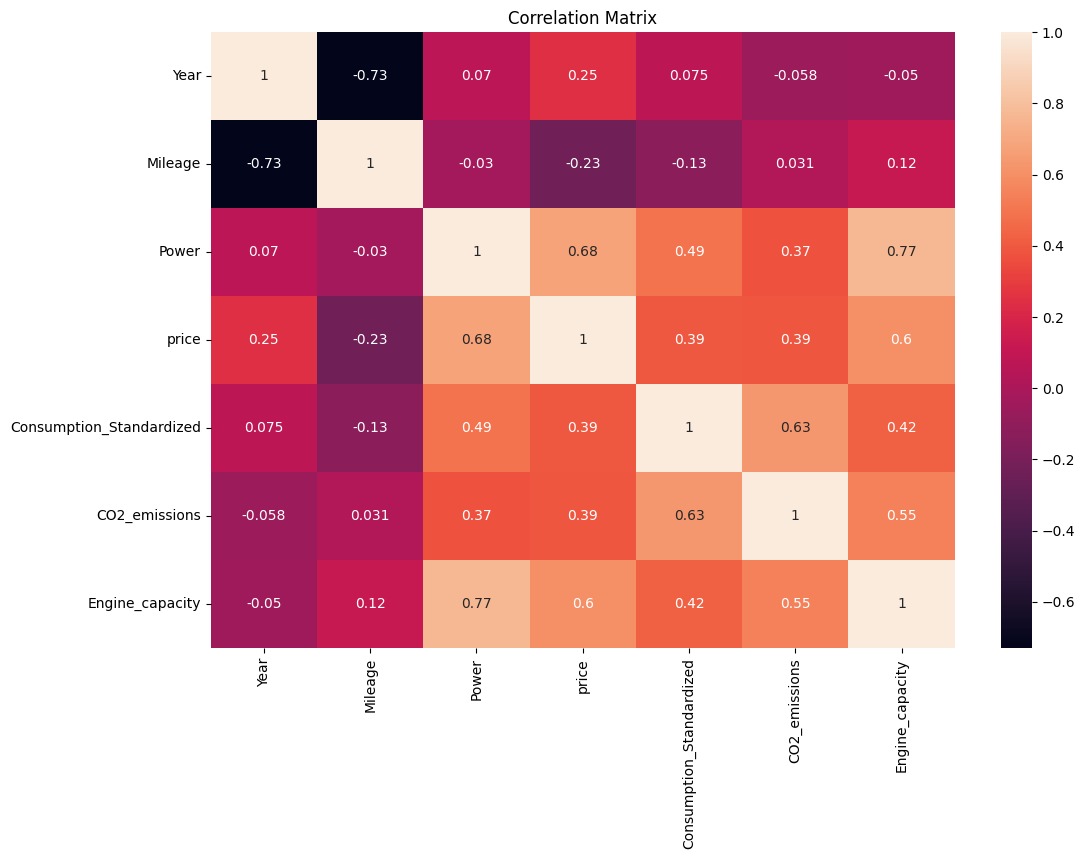

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_column].corr(), annot=True)
plt.title('Correlation Matrix')

### Raisons pour Ne Pas Supprimer les Colonnes

Toutes les colonnes de notre dataset semblent jouer un rôle important et sont significatives pour comprendre les relations entre les caractéristiques des véhicules. Voici pourquoi il serait déconseillé de supprimer certaines colonnes sans justification :

1. **Corrélations Importantes Entre Certaines Colonnes :**
   - Par exemple, **`Power`** et **`Engine_capacity`** sont fortement corrélés avec **`price`**. Si vous supprimez l’une d’elles, vous pourriez perdre une information importante qui influence le prix.

2. **Relations Environnementales :**
   - Les colonnes comme **`Consumption_Standardized`** et **`CO2_emissions`** sont essentielles pour comprendre l’impact environnemental du véhicule. Même si elles semblent légèrement redondantes, elles apportent une perspective importante.

3. **Caractéristiques du Véhicule (Année et Usage) :**
   - **`Year`** et **`Mileage`** aident à évaluer l’état d’un véhicule. Ces colonnes sont utiles pour prédire la dépréciation ou la valeur de revente.

4. **Variabilité du Modèle :**
   - Même si certaines variables présentent des corrélations entre elles (par exemple, **`Power`** et **`Engine_capacity`**), elles ne sont pas interchangeables. Elles mesurent des aspects distincts du véhicule.



# Catagorical columns


In [24]:
categorical_column = ['Transmission', 'Fuel', 'Doors','Emission_class','Seats','Drive_type']

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21360 entries, 0 to 21359
Data columns (total 90 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Mileage                                    21360 non-null  int64  
 1   Power                                      21360 non-null  float64
 2   Transmission                               21360 non-null  int64  
 3   Fuel                                       21360 non-null  int64  
 4   Drive_type                                 21360 non-null  int64  
 5   Doors                                      21360 non-null  int64  
 6   Seats                                      21360 non-null  int64  
 7   CO2_emissions                              21360 non-null  float64
 8   Engine_capacity                            21360 non-null  float64
 9   Emission_class                             21360 non-null  int64  
 10  price                 

In [26]:
df.describe()
print(df.columns)

Index(['Mileage', 'Power', 'Transmission', 'Fuel', 'Drive_type', 'Doors',
       'Seats', 'CO2_emissions', 'Engine_capacity', 'Emission_class', 'price',
       'Consumption_Standardized', 'Year', 'Abarth', 'Alfa Romeo',
       'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Citroën',
       'Cupra', 'DR Automobiles', 'DS Automobiles', 'Dacia', 'Ferrari', 'Fiat',
       'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini',
       'Lancia', 'Land Rover', 'Lexus', 'Lynk & Co', 'MG', 'MINI', 'Maserati',
       'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
       'Polestar', 'Porsche', 'Renault', 'Seat', 'Smart', 'SsangYong',
       'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'Škoda',
       'Body_color_Black', 'Body_color_Blue', 'Body_color_Brown',
       'Body_color_Gold', 'Body_color_Green', 'Body_color_Grey',
       'Body_color_Orange', 'Body_color_Purple', 'Body_color_Red',
       'Body_color_Silver', 'Body_color_White', 'B

#### Display basic information about the dataset


In [27]:
print("Dataset Information:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21360 entries, 0 to 21359
Data columns (total 90 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Mileage                                    21360 non-null  int64  
 1   Power                                      21360 non-null  float64
 2   Transmission                               21360 non-null  int64  
 3   Fuel                                       21360 non-null  int64  
 4   Drive_type                                 21360 non-null  int64  
 5   Doors                                      21360 non-null  int64  
 6   Seats                                      21360 non-null  int64  
 7   CO2_emissions                              21360 non-null  float64
 8   Engine_capacity                            21360 non-null  float64
 9   Emission_class                             21360 non-null  int64  
 10  p

### Categorical columns analysis

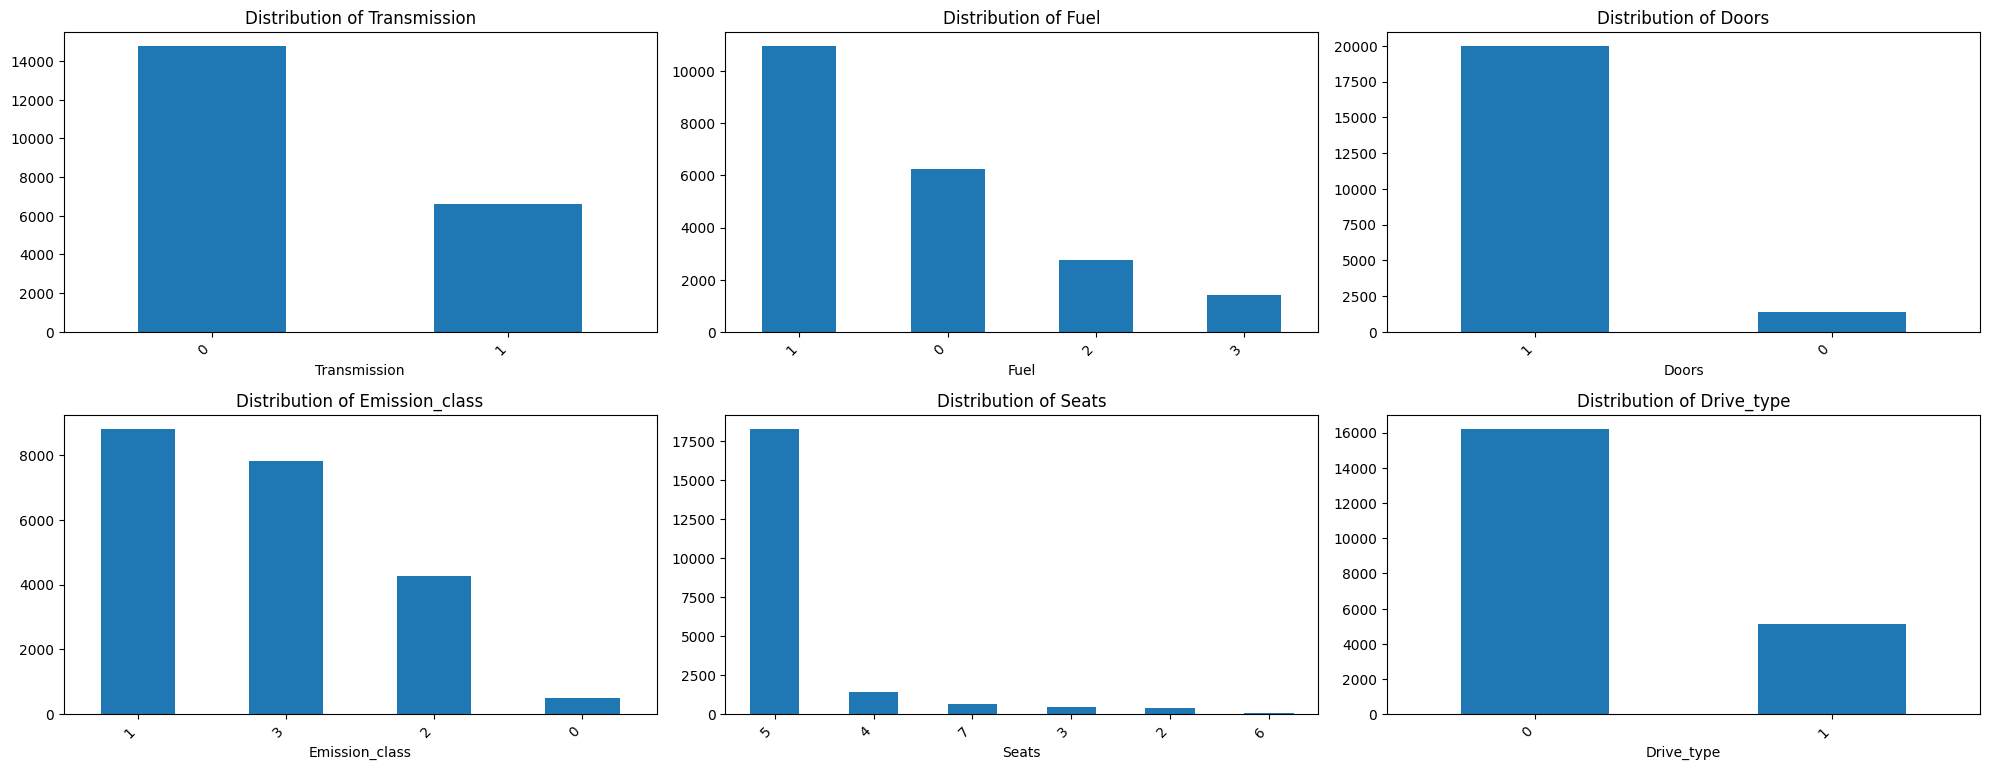

In [28]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_column, 1):
    plt.subplot(4, 3, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Relationship between categorical and numerical columns

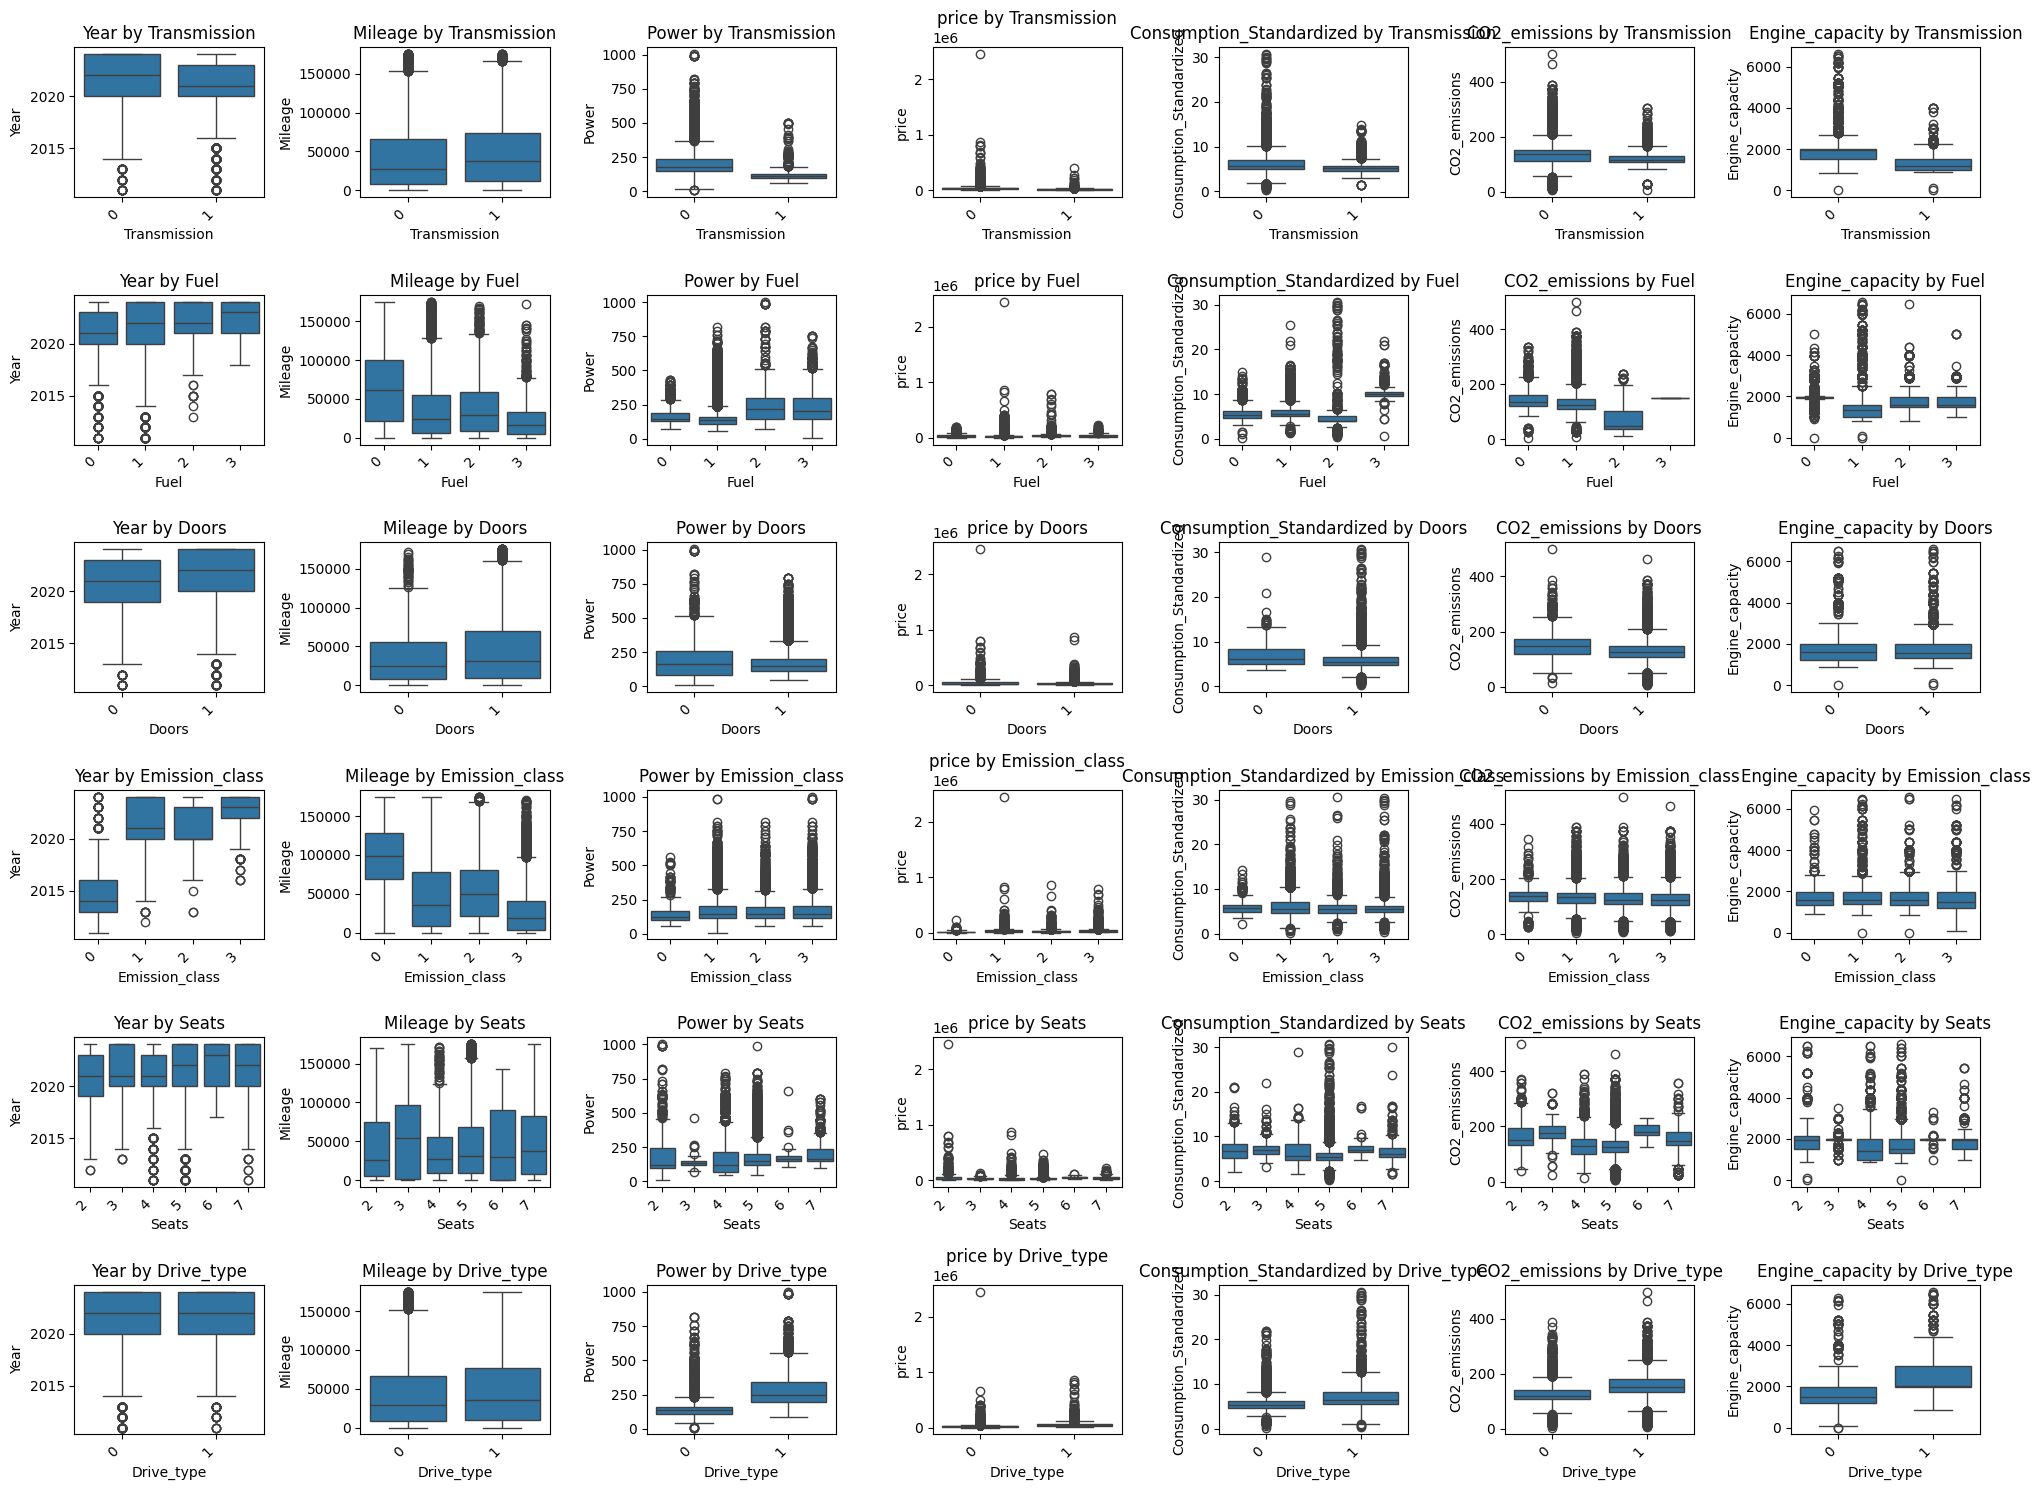

In [29]:
plt.figure(figsize=(20, 15))
for i, cat_col in enumerate(categorical_column, 1):
    for j, num_col in enumerate(numerical_column, 1):
        plt.subplot(len(categorical_column), len(numerical_column), (i-1)*len(numerical_column) + j)
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
df.shape

(21360, 90)

### Correlation between price and categorial column 

Top 10 brand correlations with price:
price            1.000000
Ferrari          0.465914
Porsche          0.313977
Lamborghini      0.238503
Mercedes-Benz    0.138376
Bentley          0.107714
Aston Martin     0.104501
BMW              0.097737
Land Rover       0.095344
Audi             0.085101
Name: price, dtype: float64


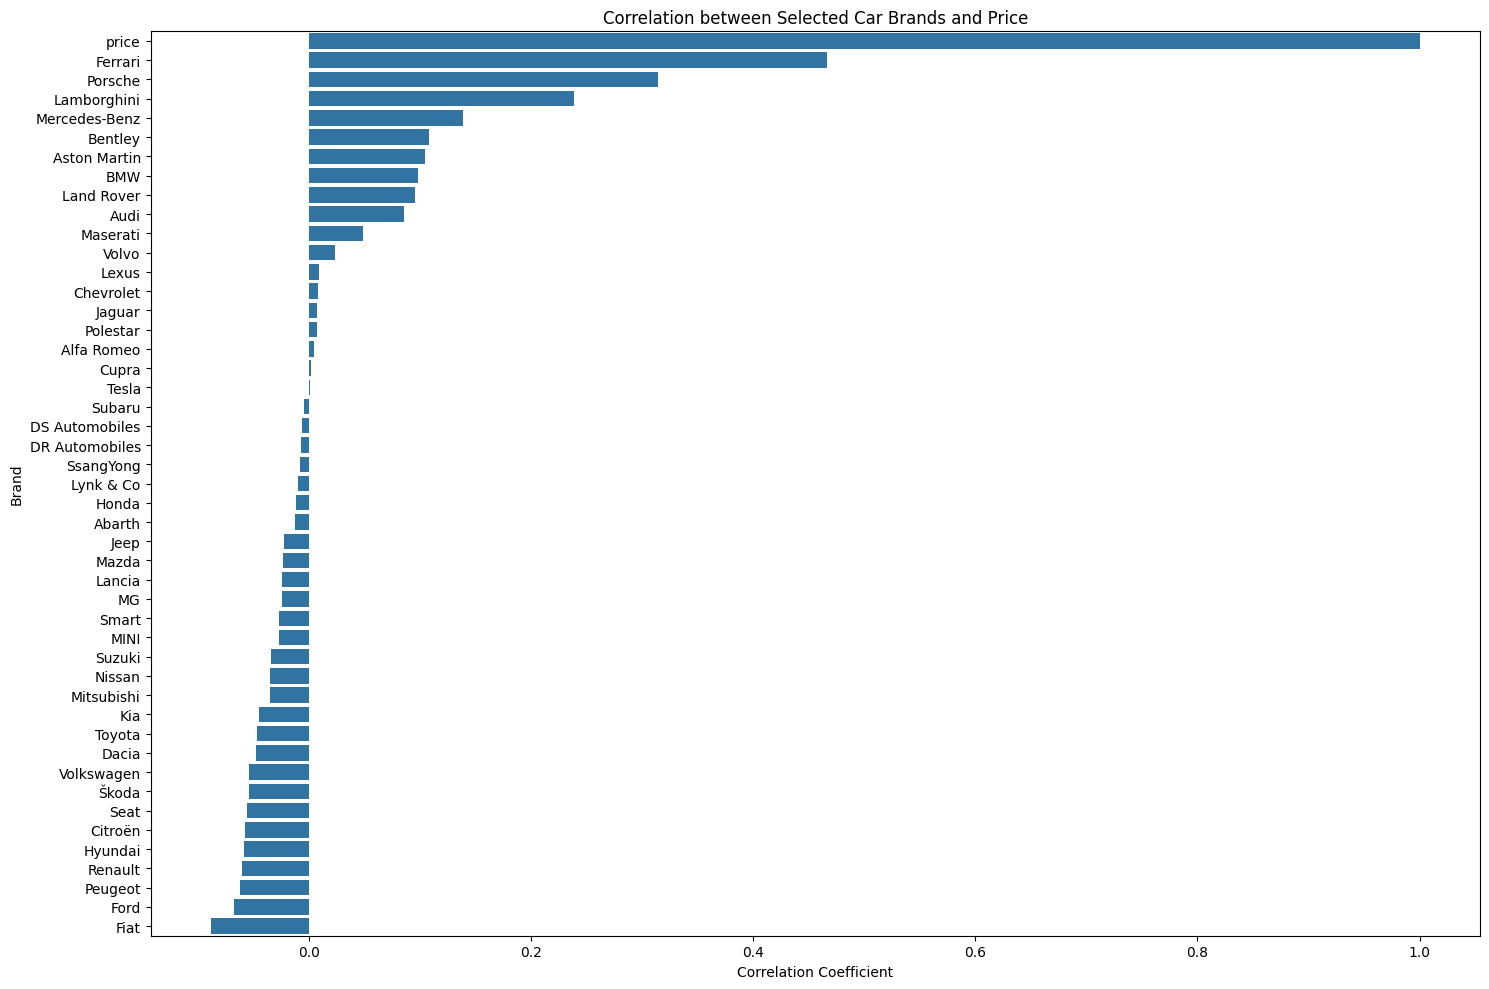

In [31]:
# List of specific brands to analyze
brands = ['Abarth', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 
          'Chevrolet', 'Citroën', 'Cupra', 'DR Automobiles', 'DS Automobiles',
          'Dacia', 'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar',
          'Jeep', 'Kia', 'Lamborghini', 'Lancia', 'Land Rover', 'Lexus',
          'Lynk & Co', 'MG', 'MINI', 'Maserati', 'Mazda', 'Mercedes-Benz',
          'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Polestar', 'Porsche',
          'Renault', 'Seat', 'Smart', 'SsangYong', 'Subaru', 'Suzuki', 
          'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'Škoda']

# Get make columns for these brands
make_cols = [col for col in brands]

# Calculate correlations
correlations = df[make_cols + ['price']].corr()['price'].sort_values(ascending=False)

# Create visualization
plt.figure(figsize=(15, 10))
sns.barplot(x=correlations.values[:-1],  # Exclude price self-correlation
            y=correlations.index[:-1],
            orient='h')

plt.title('Correlation between Selected Car Brands and Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Brand')

# Print top correlations
print("Top 10 brand correlations with price:")
print(correlations[:-1].head(10))

plt.tight_layout()
plt.show()

Correlations between interior materials and price:
price                                        1.000000
Interior_material_Full leather interior      0.296663
Interior_material_Part leather interior      0.007797
Interior_material_Velour interior           -0.000942
Interior_material_Other interior material   -0.055940
Name: price, dtype: float64


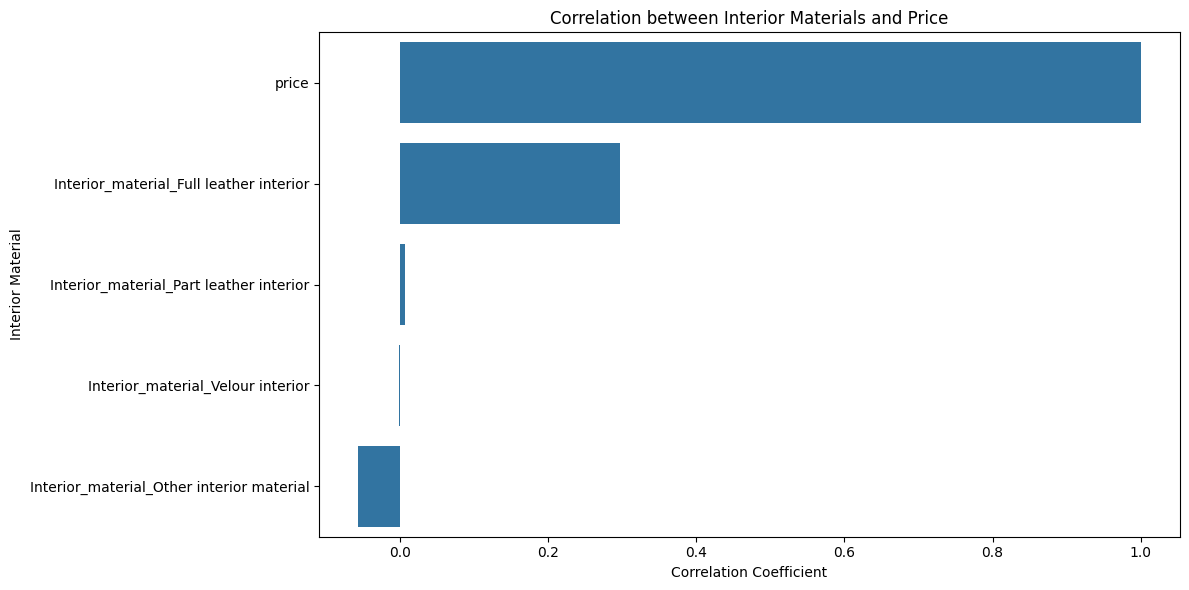

In [32]:
# Extract interior material columns
interior_material_cols = [col for col in df.columns if 'Interior_material' in col]

# Calculate correlations
interior_correlations = df[interior_material_cols + ['price']].corr()['price'].sort_values(ascending=False)

# Create visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=interior_correlations.values[:-1],  # Exclude price self-correlation
            y=interior_correlations.index[:-1],
            orient='h')

plt.title('Correlation between Interior Materials and Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Interior Material')

# Print correlations
print("Correlations between interior materials and price:")
print(interior_correlations[:-1])

plt.tight_layout()
plt.show()

Toutes les colonnes d'interior color:
['Interior_color_Black interior', 'Interior_color_Brown interior', 'Interior_color_Grey interior', 'Interior_color_Other interior']

Corrélations entre tous les interior colors et price:
price                            1.000000
Interior_color_Brown interior    0.078104
Interior_color_Black interior    0.060847
Interior_color_Grey interior    -0.043642
Name: price, dtype: float64


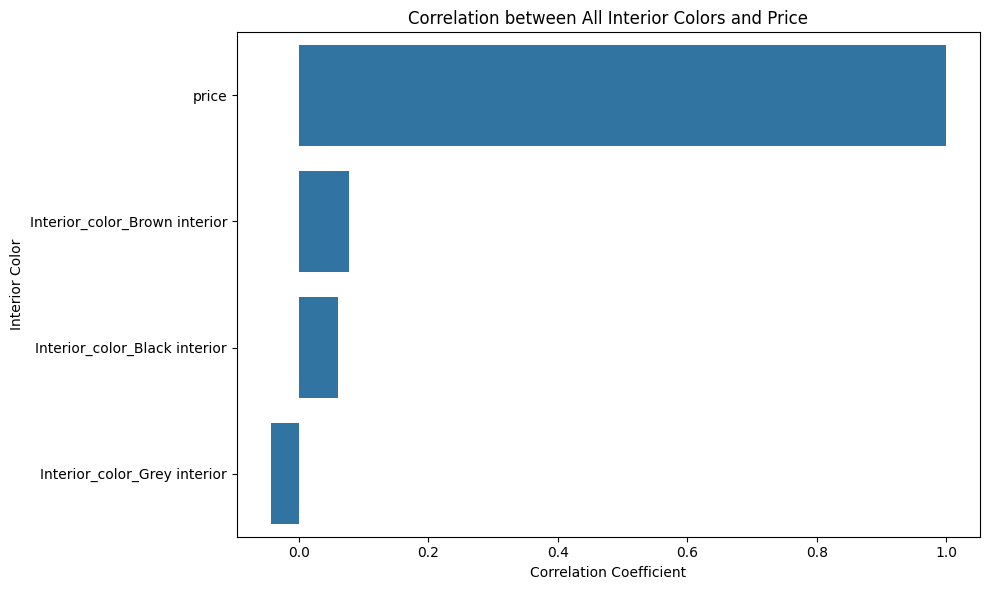

In [33]:
# Vérifier toutes les colonnes d'interior color
print("Toutes les colonnes d'interior color:")
interior_color_cols = [col for col in df.columns if 'Interior_color' in col]
print(interior_color_cols)

# Calculer les corrélations en incluant explicitement 'Interior_color_Other interior'
interior_color_correlations = df[interior_color_cols + ['price']].corr()['price']
interior_color_correlations = interior_color_correlations.sort_values(ascending=False)

# Créer visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x=interior_color_correlations.values[:-1],
            y=interior_color_correlations.index[:-1],
            orient='h')

plt.title('Correlation between All Interior Colors and Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Interior Color')

# Afficher toutes les corrélations
print("\nCorrélations entre tous les interior colors et price:")
print(interior_color_correlations[:-1])

plt.tight_layout()
plt.show()

Correlations between body colors and price:
price                1.000000
Body_color_Black     0.083296
Body_color_Green     0.065326
Body_color_Purple    0.018207
Body_color_Grey      0.017101
Body_color_Yellow    0.001725
Body_color_Gold     -0.001609
Body_color_Brown    -0.010040
Body_color_Orange   -0.012103
Body_color_Blue     -0.026229
Body_color_Red      -0.026279
Body_color_Silver   -0.030302
Name: price, dtype: float64


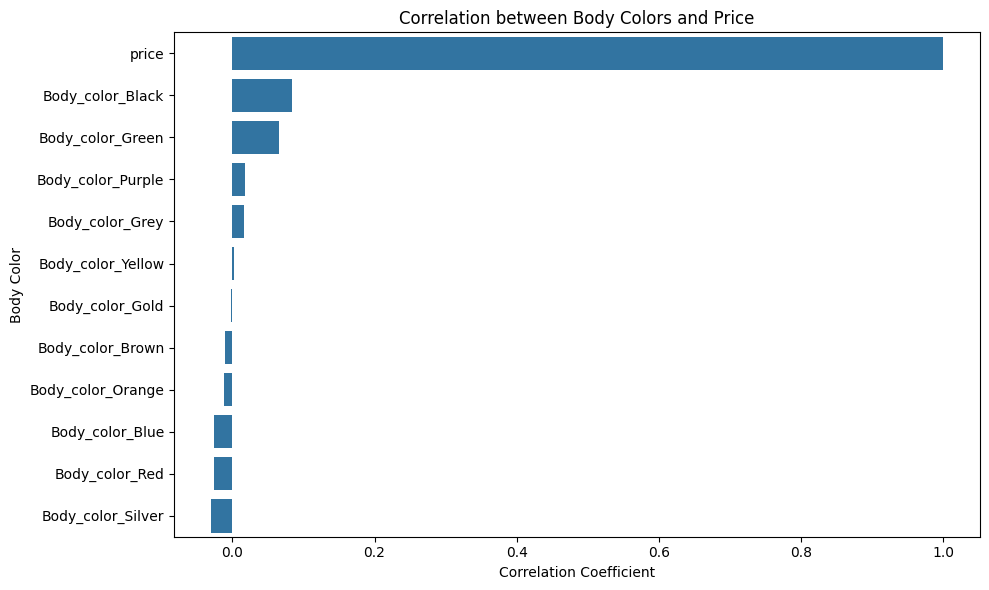

In [34]:
# Extract body color columns
body_color_cols = [col for col in df.columns if 'Body_color' in col]

# Calculate correlations
body_color_correlations = df[body_color_cols + ['price']].corr()['price'].sort_values(ascending=False)

# Create visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=body_color_correlations.values[:-1],  # Exclude price self-correlation
            y=body_color_correlations.index[:-1],
            orient='h')

plt.title('Correlation between Body Colors and Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Body Color')

# Print correlations
print("Correlations between body colors and price:")
print(body_color_correlations[:-1])

plt.tight_layout()
plt.show()

Correlations between body types and price:
price                    1.000000
Body_Coupe               0.242772
Body_color_Black         0.083296
Body_MPV/VAN             0.067992
Body_SUV / offroad       0.065997
Body_color_Green         0.065326
Body_Sedans / saloons    0.044610
Body_Pick-up             0.027433
Body_color_Purple        0.018207
Body_color_Grey          0.017101
Body_color_Yellow        0.001725
Body_color_Gold         -0.001609
Body_color_Brown        -0.010040
Body_color_Orange       -0.012103
Body_Cargo VAN          -0.019490
Body_Station Wagon      -0.026171
Body_color_Blue         -0.026229
Body_color_Red          -0.026279
Body_color_Silver       -0.030302
Body_MPV                -0.045842
Body_color_White        -0.072563
Name: price, dtype: float64


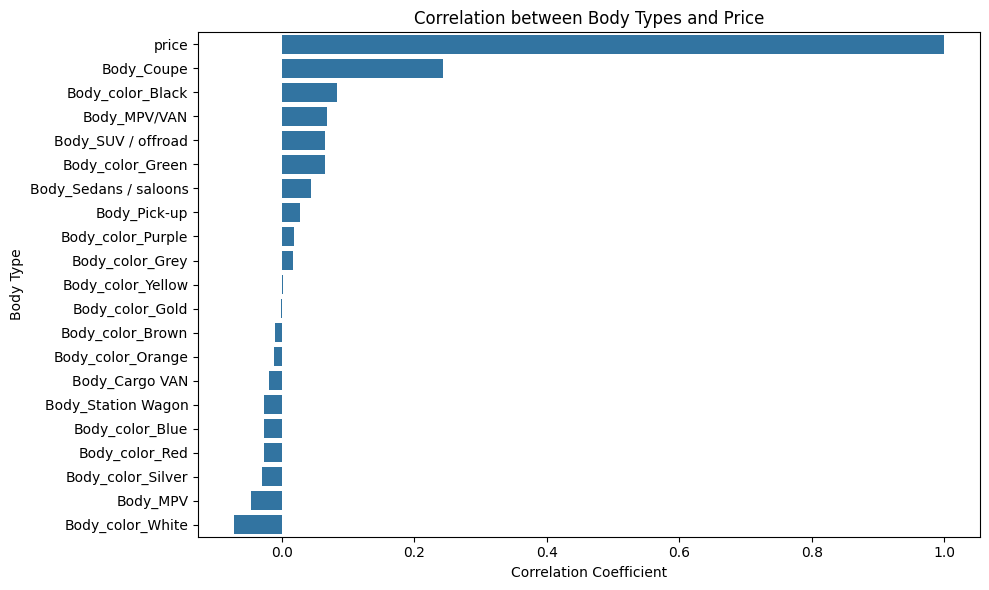

In [35]:
# Extract body type columns
body_cols = [col for col in df.columns if 'Body_' in col]

# Calculate correlations
body_correlations = df[body_cols + ['price']].corr()['price'].sort_values(ascending=False)

# Create visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=body_correlations.values[:-1],  # Exclude price self-correlation
            y=body_correlations.index[:-1],
            orient='h')

plt.title('Correlation between Body Types and Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Body Type')

# Print correlations
print("Correlations between body types and price:")
print(body_correlations[:-1])

plt.tight_layout()
plt.show()

### je veut supprimé les colonnes qu'ils ont une  correlation très petit avec le prix
les colonnes de **Interior_color** et **Body_color** on va les supprimées

In [36]:
# Get columns to drop
interior_color_cols = [col for col in df.columns if 'Interior_color' in col]
body_color_cols = [col for col in df.columns if 'Body_color' in col]
columns_to_drop = interior_color_cols + body_color_cols

# Drop columns
df = df.drop(columns=columns_to_drop)

# Verify columns were dropped
print("Columns dropped:")
for col in columns_to_drop:
    print(col)

print("\nRemaining columns:")
print(df.columns.tolist())

# Verify shape of dataframe
print(f"\nNew DataFrame shape: {df.shape}")

Columns dropped:
Interior_color_Black interior
Interior_color_Brown interior
Interior_color_Grey interior
Interior_color_Other interior
Body_color_Black
Body_color_Blue
Body_color_Brown
Body_color_Gold
Body_color_Green
Body_color_Grey
Body_color_Orange
Body_color_Purple
Body_color_Red
Body_color_Silver
Body_color_White
Body_color_Yellow

Remaining columns:
['Mileage', 'Power', 'Transmission', 'Fuel', 'Drive_type', 'Doors', 'Seats', 'CO2_emissions', 'Engine_capacity', 'Emission_class', 'price', 'Consumption_Standardized', 'Year', 'Abarth', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Citroën', 'Cupra', 'DR Automobiles', 'DS Automobiles', 'Dacia', 'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Lancia', 'Land Rover', 'Lexus', 'Lynk & Co', 'MG', 'MINI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Polestar', 'Porsche', 'Renault', 'Seat', 'Smart', 'SsangYong', 'Subaru', 'Suzuki', 'Tesla', 

In [37]:
# Save final DataFrame to CSV
df.to_csv('dataFinal.csv', index=False)

# Verify file was created and show first few rows
print("File saved as dataFinal.csv")
print("\nFirst few rows of saved data:")
pd.read_csv('dataFinal.csv').head()

# Show file info
import os
file_size = os.path.getsize('dataFinal.csv') / 1024  # Size in KB
print(f"\nFile size: {file_size:.2f} KB")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")

File saved as dataFinal.csv

First few rows of saved data:

File size: 3634.46 KB
Number of rows: 21360
Number of columns: 74
